# **Predicting Medical Cost**

These datasets contains 7 columns :

    age         : age of primary beneficiary

    sex         : insurance contractor gender, female, male

    bmi         : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
                  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children    : Number of children covered by health insurance / Number of dependents

    smoker      : Smoking

    region      : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges     : Individual medical costs billed by health insurance


## **Data Preparation**

In [2]:
## import required library
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Load Datasets
df = pd.read_csv('insurance.csv')

## Check Datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


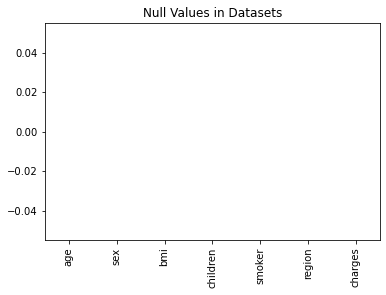

In [4]:
## Checking Null Values
plt.title('Null Values in Datasets')
df.isnull().sum().plot(kind='bar')
None

In [5]:
## Data Transformation
## Change smoker and sex columns into binary 1 and 0 
df.loc[df.smoker=='yes', 'smoker']=1
df.loc[df.smoker=='no', 'smoker']=0

df.loc[df.sex=='male', 'sex']=1
df.loc[df.sex=='female', 'sex']=0

## One-Hot Encoding for Region Columns

In [6]:
from sklearn.preprocessing import OneHotEncoder
## Encoder Model
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

## Transform Region column
encoded_region = encoder.fit_transform(df[['region']])

## Create new Dataframe
encoded_df = pd.DataFrame(encoded_region, columns=encoder.get_feature_names_out())

## Combine encoded_df into original df
df = pd.concat([df, encoded_df], axis=1)

## Drop Original Region Columns
df = df.drop(columns=['region'])

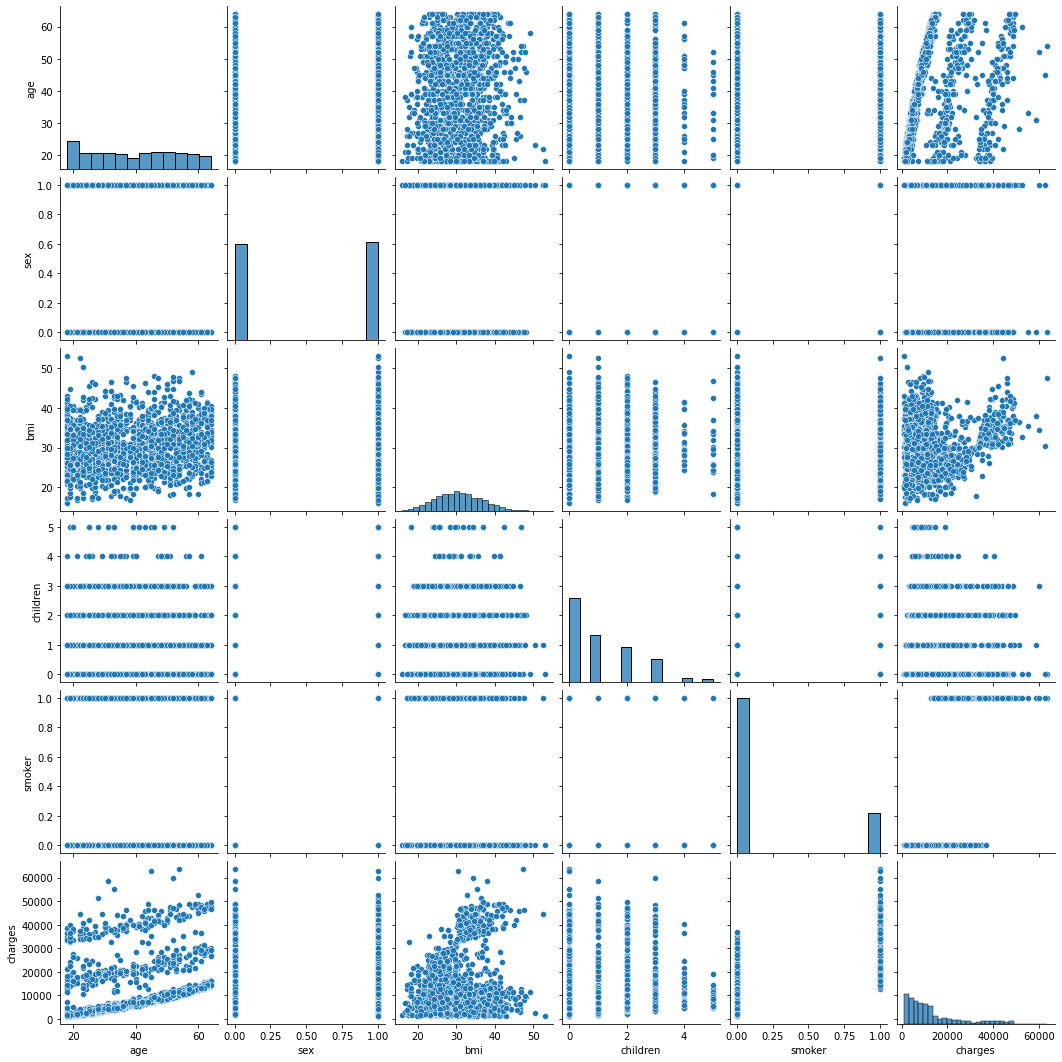

In [7]:
## Pairplot
## Check Distribution of each columns
## Check relationship between columns
sns.pairplot(df.iloc[:,:6])

In [8]:
## Split Data into Test and Train
## Determine Target Feature and Input Feature

## Target Feature
y = df['charges']

## Input Feature
feature = list(df.columns)
feature.remove('charges')
x = df[feature]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

**Finding**
- Dataset contains 7 Columns and 1338 Rows
- Dataset contains 4 Numerical Columns and 3 Categorical
- There's no missing values in the datasets
- Charges distribution is Right Skewed
- BMI data is normally distributed
- There's correlation between age and charges, but there's also 3 cluster in the data
- There's correlation between smoker columns and charges. A smoker tend to have higher medical charges

## **Modeling**

In this step I am going to perform some prediction model to find the most accurate model to predict Medical Cost

### **Linear Regression**

In [9]:
## Import Required Library
## Algorithm
from sklearn.linear_model import LinearRegression

## Evaluation Metrics
from sklearn.metrics import mean_absolute_error

## Define Model
model = LinearRegression()

## Train Model
model.fit(X=X_train, y=y_train)

## Predict Value
prediction = model.predict(X_test)

## Evaluate Model
mae = round(mean_absolute_error(y_true = y_test, y_pred=prediction),2)
print(f'Mean Absolute Error for Linear Regression Model is {mae}')

Mean Absolute Error for Linear Regression Model is 4195.0


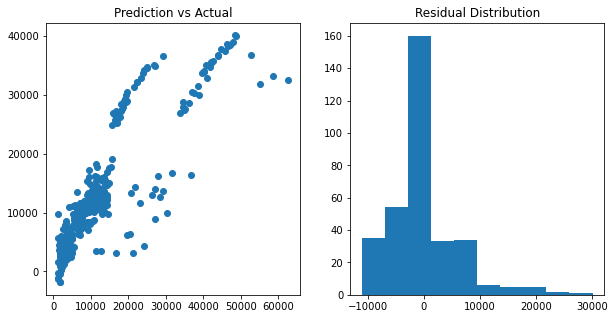

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].scatter(y_test, prediction)
axs[1].hist((y_test-prediction))

axs[0].set_title('Prediction vs Actual')
axs[1].set_title('Residual Distribution')
None

### **KNN**

In [11]:
## Split Data into Test and Train
## Determine Target Feature and Input Feature

## Target Feature
y = df['charges']

## Input Feature
x = df[['age','smoker','bmi','children']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

## Scaled the Datasets because KNN are Distance Based Algorithm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
## Import Required Library
## Algorithm
from sklearn.neighbors import KNeighborsRegressor

## Evaluation Metrics
from sklearn.metrics import mean_absolute_error

## Define Model
for i in np.arange(1,20,1):
    model = KNeighborsRegressor(n_neighbors=i)

    ## Fit Model
    model.fit(X=X_train, y=y_train)

    ## Predict Value
    prediction = model.predict(X_test)
    prediction_train = model.predict(X_train)

    ## Calculate MAE
    mae_train = round(mean_absolute_error(y_true = y_train, y_pred=prediction_train),2)
    mae_test = round(mean_absolute_error(y_true = y_test, y_pred=prediction),2)

    ## Print MAE
    print(f'Neighbors {i} MAE Train= {mae_train}, MAE Test = {mae_test}')

Neighbors 1 MAE Train= 1.27, MAE Test = 3749.38
Neighbors 2 MAE Train= 1472.39, MAE Test = 3398.61
Neighbors 3 MAE Train= 1981.17, MAE Test = 3149.88
Neighbors 4 MAE Train= 2243.19, MAE Test = 2963.16
Neighbors 5 MAE Train= 2380.13, MAE Test = 2933.85
Neighbors 6 MAE Train= 2465.63, MAE Test = 2924.33
Neighbors 7 MAE Train= 2494.78, MAE Test = 2932.48
Neighbors 8 MAE Train= 2560.12, MAE Test = 2872.72
Neighbors 9 MAE Train= 2588.03, MAE Test = 2853.58
Neighbors 10 MAE Train= 2611.62, MAE Test = 2853.64
Neighbors 11 MAE Train= 2652.51, MAE Test = 2853.95
Neighbors 12 MAE Train= 2682.78, MAE Test = 2840.59
Neighbors 13 MAE Train= 2715.92, MAE Test = 2882.47
Neighbors 14 MAE Train= 2740.54, MAE Test = 2909.94
Neighbors 15 MAE Train= 2757.56, MAE Test = 2879.68
Neighbors 16 MAE Train= 2772.78, MAE Test = 2899.58
Neighbors 17 MAE Train= 2771.9, MAE Test = 2925.28
Neighbors 18 MAE Train= 2789.16, MAE Test = 2918.68
Neighbors 19 MAE Train= 2805.65, MAE Test = 2930.96


In [13]:
## Import Required Library
## Algorithm
from sklearn.neighbors import KNeighborsRegressor

## Evaluation Metrics
from sklearn.metrics import mean_absolute_error

## Define Model
for i in np.arange(1,20,1):
    model = KNeighborsRegressor(n_neighbors=i)

    ## Fit Model
    model.fit(X=X_train, y=y_train)

    ## Predict Value
    prediction = model.predict(X_test)
    prediction_train = model.predict(X_train)

    ## Calculate MAE
    mae_train = round(mean_absolute_error(y_true = y_train, y_pred=prediction_train),2)
    mae_test = round(mean_absolute_error(y_true = y_test, y_pred=prediction),2)

    ## Print MAE
    print(f'Neighbors {i} MAE Train= {mae_train}, MAE Test = {mae_test}')

Neighbors 1 MAE Train= 1.27, MAE Test = 3749.38
Neighbors 2 MAE Train= 1472.39, MAE Test = 3398.61
Neighbors 3 MAE Train= 1981.17, MAE Test = 3149.88
Neighbors 4 MAE Train= 2243.19, MAE Test = 2963.16
Neighbors 5 MAE Train= 2380.13, MAE Test = 2933.85
Neighbors 6 MAE Train= 2465.63, MAE Test = 2924.33
Neighbors 7 MAE Train= 2494.78, MAE Test = 2932.48
Neighbors 8 MAE Train= 2560.12, MAE Test = 2872.72
Neighbors 9 MAE Train= 2588.03, MAE Test = 2853.58
Neighbors 10 MAE Train= 2611.62, MAE Test = 2853.64
Neighbors 11 MAE Train= 2652.51, MAE Test = 2853.95
Neighbors 12 MAE Train= 2682.78, MAE Test = 2840.59
Neighbors 13 MAE Train= 2715.92, MAE Test = 2882.47
Neighbors 14 MAE Train= 2740.54, MAE Test = 2909.94
Neighbors 15 MAE Train= 2757.56, MAE Test = 2879.68
Neighbors 16 MAE Train= 2772.78, MAE Test = 2899.58
Neighbors 17 MAE Train= 2771.9, MAE Test = 2925.28
Neighbors 18 MAE Train= 2789.16, MAE Test = 2918.68
Neighbors 19 MAE Train= 2805.65, MAE Test = 2930.96


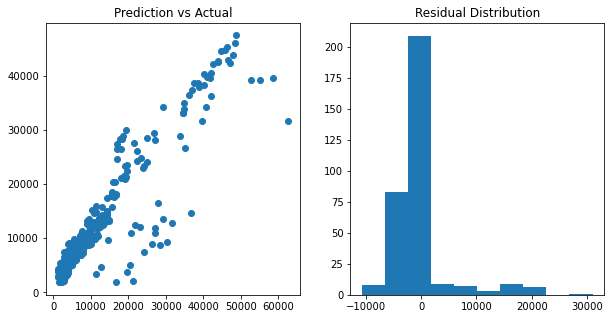

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].scatter(y_test, prediction)
axs[1].hist((y_test-prediction))

axs[0].set_title('Prediction vs Actual')
axs[1].set_title('Residual Distribution')
None

### **Tree Based** 

In [15]:
## Split Data into Test and Train
## Determine Target Feature and Input Feature

## Target Feature
y = df['charges']

## Input Feature
feature = list(df.columns)
feature.remove('charges')
x = df[feature]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [24]:
## Import Required Library
## Algorithm
from sklearn.ensemble import RandomForestRegressor

## Evaluation Metrics
from sklearn.metrics import mean_absolute_error

## Parameter Tuning
from sklearn.model_selection import GridSearchCV

## Building Model
params = {'n_estimators' : np.arange(10,200,20),
          'max_depth' : np.arange(5,25,5),
          'min_samples_leaf' : np.arange(10,200,20)}

model = RandomForestRegressor(random_state=10)

grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

grid_search.fit(X=X_train, y=y_train)

## Get the best model
model = grid_search.best_estimator_

## Model Fit
model.fit(X=X_train, y=y_train)

## Predict
prediction = model.predict(X_test)
prediction_train = model.predict(X_train)

## Calculate MAE
mae_train = round(mean_absolute_error(y_true = y_train, y_pred=prediction_train),2)
mae_test = round(mean_absolute_error(y_true = y_test, y_pred=prediction),2)

In [29]:
print(f'The best model parameter {grid_search.best_params_}')
print(f'Random Forest, MAE : {mae_test}')

The best model parameter {'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 150}
Random Forest, MAE : 2284.13


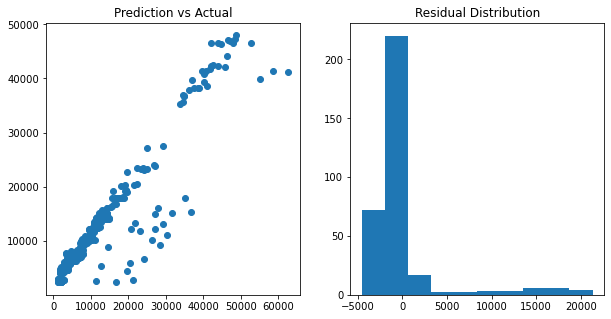

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].scatter(y_test, prediction)
axs[1].hist((y_test-prediction))

axs[0].set_title('Prediction vs Actual')
axs[1].set_title('Residual Distribution')
None